# Building an Image Classification Model

**Dataset:** MNIST **[Loading using TensorFlow]**

Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
1. Loading and preprocessing the image data
2. Defining the model's architecture
3. Training the model
4. Estimating the model's performance

### Import Necessary Packages

Import the necessary libraries for building and training the model:
- **NumPy** for numerical operations.
- **Matplotlib** for plotting the training curves.
- **Keras** for creating and training the neural network model.
- **LabelBinarizer** from sklearn for encoding labels into a one-hot format.

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### 1. Loading and Preprocessing the Image Data

- The MNIST dataset contains 60,000 training and 10,000 testing grayscale images of digits (0-9).
- We will normalize the images to be in the range [0, 1] and reshape them for use in the CNN.

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


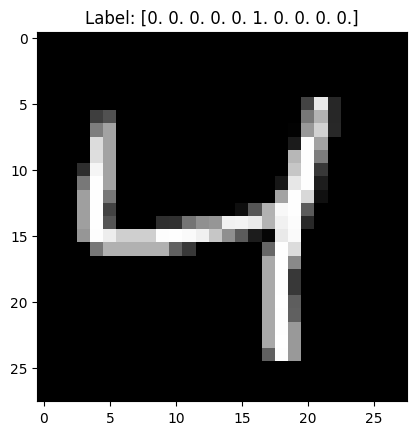

In [3]:
# Load MNIST dataset (images and labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to be in the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images to be compatible with CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the training data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Display a sample image
plt.imshow(x_train[2].reshape(28, 28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

### 2. Defining the Model's Architecture

The model consists of:
1. **Two convolutional layers**, each followed by max pooling to reduce the spatial dimensions of the feature maps.
2. **A flatten layer** to convert the 2D outputs from the convolutional layers into a 1D vector.
3. **Fully connected (dense) layers** for classification, with a softmax output layer to handle the 10 classes.

We use the Adam optimizer and categorical cross-entropy loss for multi-class classification.

In [4]:
# Create a sequential model
model = Sequential()

# Add first convolutional layer (32 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Add second convolutional layer (64 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D output to 1D
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each class)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training the Model

In this step, the model is trained using the training data (`x_train` and `y_train`). The model will be trained for 10 epochs with a batch size of 128. We also provide validation data (`x_test` and `y_test`) to track the model's performance during training.

In [5]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

Epoch 1/10


469/469 - 11s - 24ms/step - accuracy: 0.9419 - loss: 0.1996 - val_accuracy: 0.9798 - val_loss: 0.0605
Epoch 2/10
469/469 - 8s - 18ms/step - accuracy: 0.9830 - loss: 0.0557 - val_accuracy: 0.9852 - val_loss: 0.0460
Epoch 3/10
469/469 - 9s - 19ms/step - accuracy: 0.9887 - loss: 0.0374 - val_accuracy: 0.9876 - val_loss: 0.0367
Epoch 4/10
469/469 - 9s - 19ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9881 - val_loss: 0.0332
Epoch 5/10
469/469 - 9s - 18ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9903 - val_loss: 0.0271
Epoch 6/10
469/469 - 9s - 20ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.9906 - val_loss: 0.0285
Epoch 7/10
469/469 - 9s - 19ms/step - accuracy: 0.9955 - loss: 0.0136 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 8/10
469/469 - 9s - 18ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 9/10
469/469 - 9s - 19ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9890 - val_loss: 0.0354
Ep

### 4. Estimating the Model's Performance

We evaluate the trained model on the test dataset (`x_test` and `y_test`). We also plot the training and validation accuracy and loss curves to assess the model's performance over the epochs.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0420
Test accuracy: 99.12%


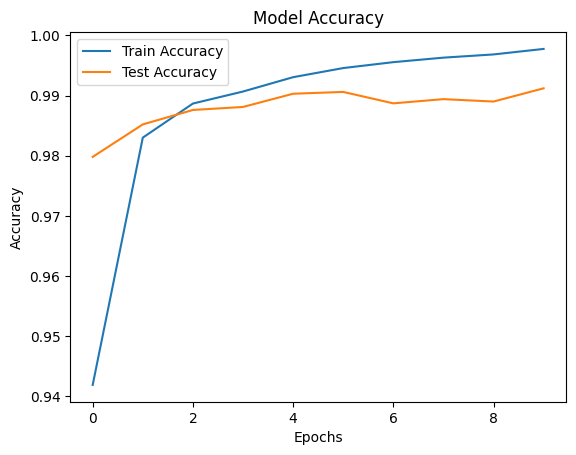

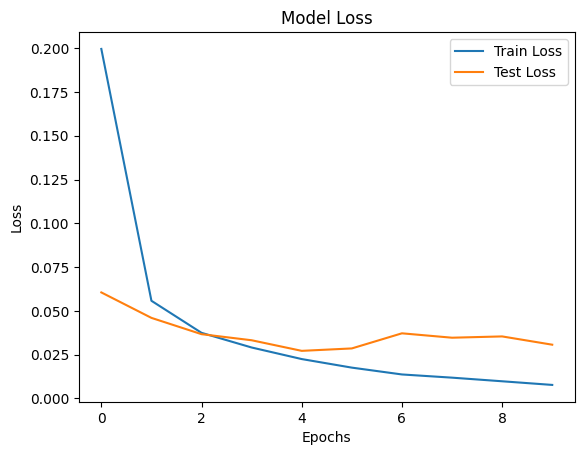

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Visualize Model Prediction on a Single Test Image

To gain insight into the model’s predictions, we’ll visualize a single test image alongside the model's predicted label. This step allows us to manually verify if the predicted label aligns with the content of the image. We use `model.predict()` to get the predicted probabilities for each class and then use `np.argmax()` to identify the class with the highest probability as the predicted label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


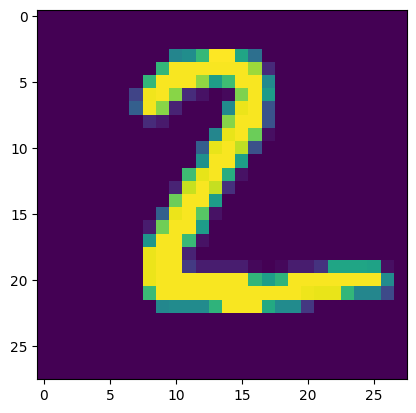

2


In [7]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(np.argmax(predicted_value[1], axis=0))